In [1]:
import xarray as xr
import numpy as np

c:\Users\purav\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
nc_file = r"C:\Users\purav\OneDrive\Desktop\Fi Year Project\Final-Year-Project\Data\Rainfall\RF25_ind2000_rfp25.nc"
ds = xr.open_dataset(nc_file)

print(ds)

<xarray.Dataset>
Dimensions:    (LONGITUDE: 135, LATITUDE: 129, TIME: 366)
Coordinates:
  * LONGITUDE  (LONGITUDE) float64 66.5 66.75 67.0 67.25 ... 99.5 99.75 100.0
  * LATITUDE   (LATITUDE) float64 6.5 6.75 7.0 7.25 ... 37.75 38.0 38.25 38.5
  * TIME       (TIME) datetime64[ns] 2000-01-01 2000-01-02 ... 2000-12-31
Data variables:
    RAINFALL   (TIME, LATITUDE, LONGITUDE) float64 ...
Attributes:
    history:      FERRET V7.5 (optimized) 20-Jan-23
    Conventions:  CF-1.6


In [5]:
rainfall = ds['RAINFALL']
rainfall = rainfall.where(rainfall != "NaN",0)
avg_rainfall = rainfall.mean(dim= 'TIME')
avg_rainfall = avg_rainfall.fillna(0)
avg_rainfall.to_netcdf("average_rainfall.nc")

In [6]:
import geopandas as gpd
import pandas as pd
from scipy.spatial import cKDTree
import numpy as np

In [7]:
grid = gpd.read_file(r"C:\Users\purav\OneDrive\Desktop\Fi Year Project\Final-Year-Project\Data\Shapefile\India Shape\grid.shp")

rainfall_ds = xr.open_dataset(r"C:\Users\purav\OneDrive\Desktop\Fi Year Project\Final-Year-Project\Notebooks\average_rainfall.nc")



In [8]:
lat = rainfall_ds['LATITUDE'].values
lon = rainfall_ds['LONGITUDE'].values
rainfall = rainfall_ds['RAINFALL'].values 

In [9]:
rainfall_points = np.array([(lat[i], lon[j]) for i in range(len(lat)) for j in range(len(lon))])
rainfall_values = rainfall.flatten()

In [10]:
tree = cKDTree(rainfall_points)

In [11]:
grid['centroid'] = grid.geometry.centroid
grid_points = np.array([(p.y, p.x) for p in grid['centroid']])

In [12]:
_, idx = tree.query(grid_points)
grid['rainfall'] = rainfall_values[idx]

In [13]:
import matplotlib.pyplot as plt

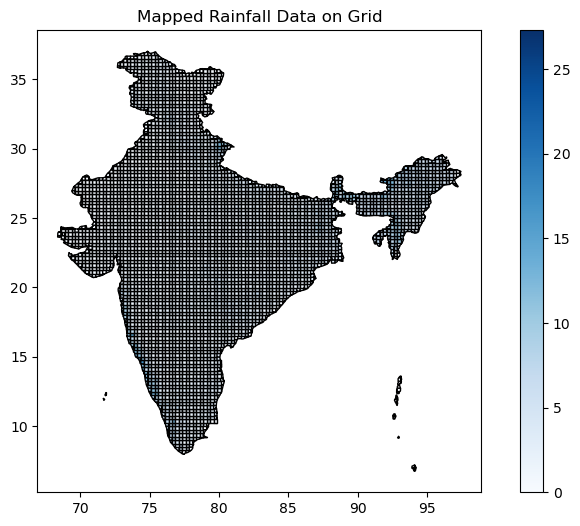

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
grid.plot(column='rainfall', cmap='Blues', edgecolor='k', legend=True, ax=ax)
plt.title("Mapped Rainfall Data on Grid")
plt.show()

In [15]:
grid[['centroid', 'rainfall']].to_csv("grid_with_rainfall.csv", index=False)

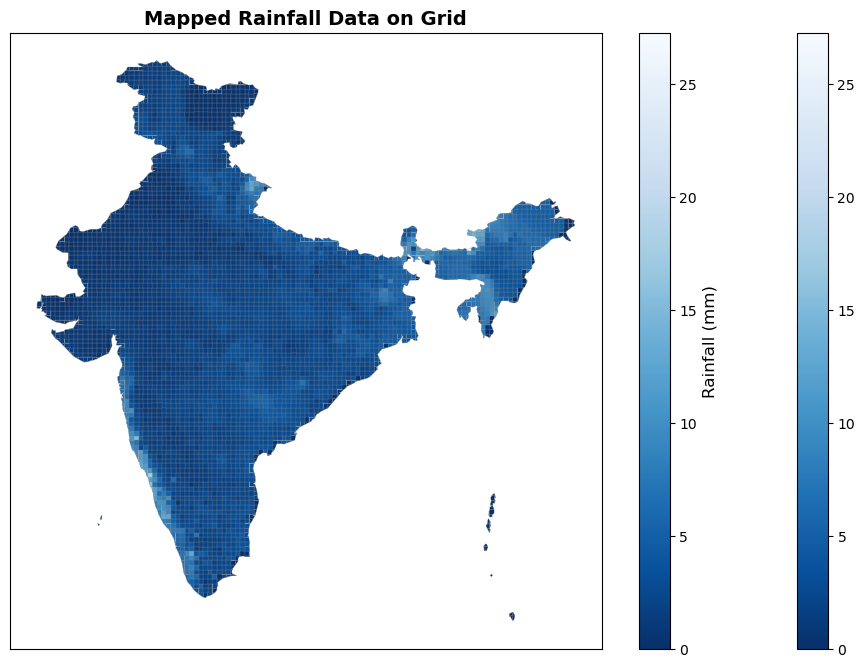

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
grid.plot(column='rainfall', cmap='Blues_r', linewidth=0.2, edgecolor='gray', legend=True, ax=ax)

# Improve the colorbar & layout
sm = plt.cm.ScalarMappable(cmap='Blues_r', norm=plt.Normalize(vmin=grid['rainfall'].min(), vmax=grid['rainfall'].max()))
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Rainfall (mm)", fontsize=12)

# Remove axis labels for cleaner visualization
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Mapped Rainfall Data on Grid", fontsize=14, fontweight='bold')

plt.show()